In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv('AB_NYC_2019.csv')
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355


In [15]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [16]:
x = df["reviews_per_month"].mean()

df["reviews_per_month"].fillna(x, inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1356\1714554077.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["reviews_per_month"].fillna(x, inplace = True)


In [17]:
df.drop_duplicates(inplace = True)

In [18]:
df.shape

(48895, 16)

A couple wants to stay at the most inexpensive place possible, in Midtown Manhatten. In this workbook we will find the most affordable bnbs there, but do some general analysis on bnbs there as well

In [19]:
air_bnb_neighborhood = df[['host_name', 'neighbourhood_group', 'neighbourhood', 'price', 'room_type']]
bnb = air_bnb_neighborhood[air_bnb_neighborhood.neighbourhood_group == 'Manhattan']
bnb_midtown = bnb[bnb.neighbourhood=='Midtown']
bnb_affordable = bnb_midtown[bnb.price < 70]
bnb_affordable.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1356\336524081.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bnb_affordable = bnb_midtown[bnb.price < 70]


,host_name,neighbourhood_group,neighbourhood,price,room_type
2527,Michel Fabrice,Manhattan,Midtown,50,Private room
7170,Norman,Manhattan,Midtown,55,Private room
10541,Phuong,Manhattan,Midtown,55,Shared room
11523,Phuong,Manhattan,Midtown,55,Shared room
11786,Ye,Manhattan,Midtown,60,Private room


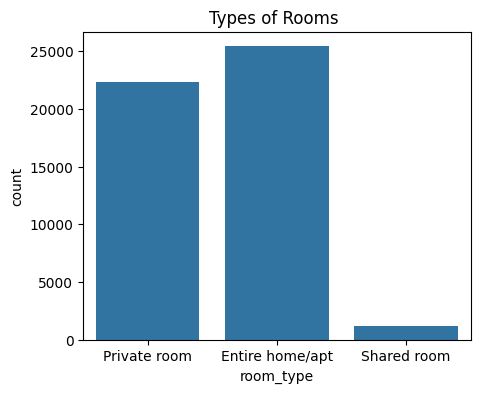

In [20]:
plt.figure(figsize=(5,4))
sns.countplot(x='room_type',data=df)
plt.title("Types of Rooms ")
plt.show()

In [21]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

QUE = In which Neighbourhood group there is maximum number of properties listed ?


In [22]:
# Assuming you have loaded your dataset into a DataFrame 
# You can count the number of listings in each neighborhood group
listings_by_neighborhood = df['neighbourhood_group'].value_counts()

# The neighborhood group with the maximum listings
max_listings_neighborhood = listings_by_neighborhood.idxmax()

print(f"The neighborhood group with the maximum number of properties listed is: {max_listings_neighborhood}")


The neighborhood group with the maximum number of properties listed is: Manhattan


<Axes: xlabel='neighbourhood_group', ylabel='price'>

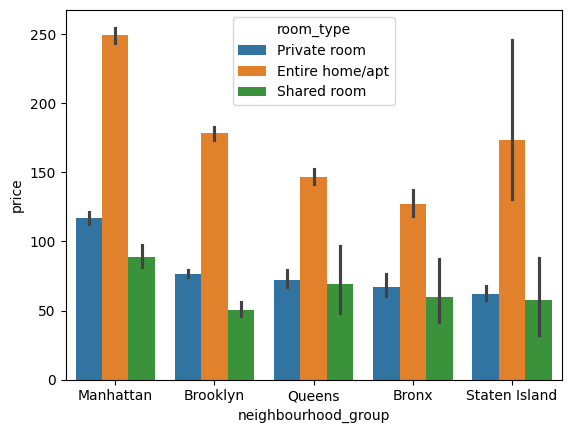

In [23]:
sns.barplot(x='neighbourhood_group', y ='price', hue ='room_type', data = df, order=df.neighbourhood_group.value_counts().index)

In [24]:
X=df['neighbourhood_group'].value_counts().index
Y=df['neighbourhood_group'].value_counts().values

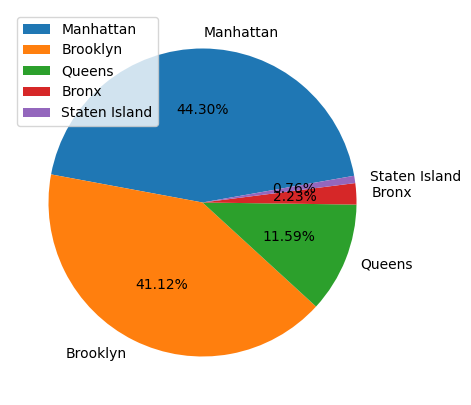

In [25]:
plt.figure(figsize=(6,5))
plt.pie(Y,labels=X,startangle=10,autopct='%0.2f%%')#starangle=means rotate the angle og pie digram,AUTOCT=use for percentage 
plt.legend(loc=2) #it foe lables for regular or delivery or express color
plt.show()

Q 2) Which host has maximum number of properties listed

In [26]:
listing_by_host =df['host_id'].value_counts()

max_listing_host_id =listing_by_host.idxmax()
max_listings_host_name = df.loc[df['host_id'] == max_listing_host_id, 'host_name'].iloc[0]
print(f"The host with the maximum number of properties listed is: {max_listings_host_name} (Host ID: {max_listing_host_id})")

The host with the maximum number of properties listed is: Sonder (NYC) (Host ID: 219517861)


Q 3) Which host has maximum properties listed in neighbourhood groups having maximum properties listed ?

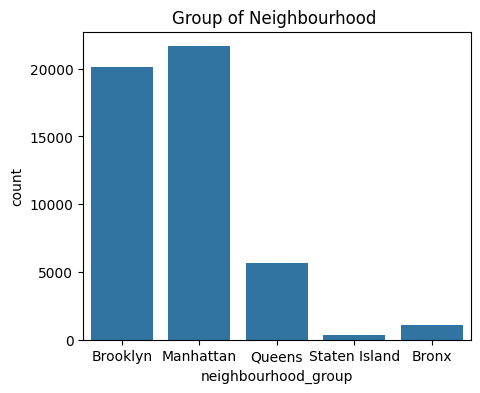

In [27]:
plt.figure(figsize=(5,4))
sns.countplot(x='neighbourhood_group',data=df)
plt.title("Group of Neighbourhood ")
plt.show()

Q4) What is the average price in different properties listed ?

In [28]:
Avg_price =df.groupby('room_type')['price'].mean()
print("Average Price by Room Type:")
print(Avg_price)

Average Price by Room Type:
room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64


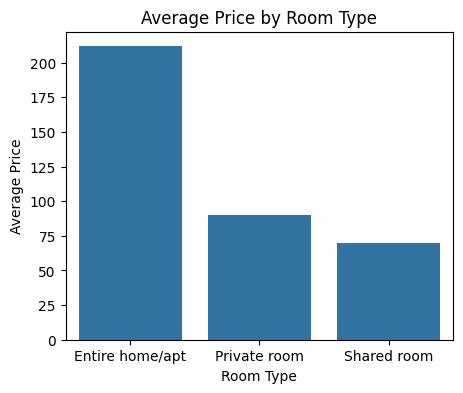

In [29]:
# Create a countplot
plt.figure(figsize=(5, 4))
sns.barplot(x=Avg_price.index, y=Avg_price.values)
plt.xlabel("Room Type")
plt.ylabel("Average Price")
plt.title("Average Price by Room Type")
plt.show()

Q 5) What may be the reason of having high price in that neighbourhood groups ?

 Let's explore the most preferred room types in each neighborhood group based on the New York City Airbnb dataset¹. Here are the findings:

1. Entire Home/Apartment:
   - This room type is the most preferred overall, accounting for approximately 52% of all listings.
   - Manhattan has the highest number of entire homes/apartments listed.

2. Private Room:
   - Private rooms make up around 45% of the listings.
   - Brooklyn has the most private rooms among the different neighborhood groups.

3. Shared Room:
   - Shared rooms are the least preferred, constituting only 2% of the listings.
   - The distribution of shared rooms is relatively low across all neighborhood groups.





Q 6) What is the most prefered room type in the every neighbourhood groups ?

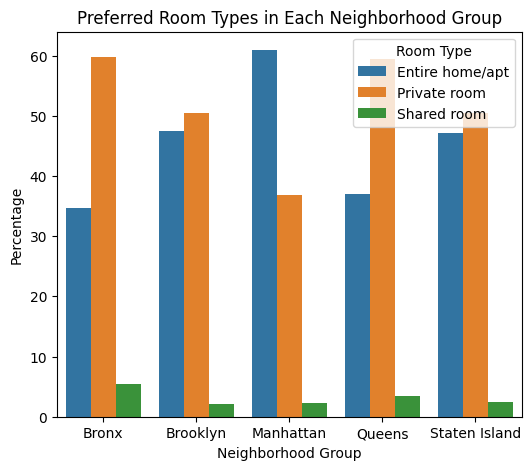

In [31]:

# Calculate the percentage of each room type within each neighborhood group
room_type_percentage = df.groupby(['neighbourhood_group', 'room_type'])['id'].count() / df.groupby('neighbourhood_group')['id'].count() * 100

# Create a bar plot to visualize the results
plt.figure(figsize=(6, 5))
sns.barplot(x='neighbourhood_group', y='id', hue='room_type', data=room_type_percentage.reset_index())
plt.xlabel("Neighborhood Group")
plt.ylabel("Percentage")
plt.title("Preferred Room Types in Each Neighborhood Group")
plt.legend(title="Room Type")
plt.show()


Q7) Total availability of properties having different room type?

In [32]:

# Calculate the total availability (sum of availability_365) for each room type
total_availability_by_room_type = df.groupby('room_type')['availability_365'].sum()

# Display the results
print("Total Availability by Room Type:")
print(total_availability_by_room_type)


Total Availability by Room Type:
room_type
Entire home/apt    2843783
Private room       2482739
Shared room         187921
Name: availability_365, dtype: int64


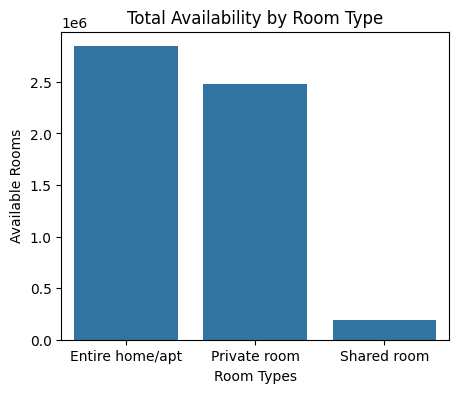

In [40]:
plt.figure(figsize=(5, 4))
sns.barplot(x=total_availability_by_room_type.index, y=total_availability_by_room_type.values)
plt.xlabel("Room Types")
plt.ylabel("Available Rooms")
plt.title("Total Availability by Room Type")
plt.show()

Q 8)Which one is the busiest host ?

In [38]:

listings_by_host = df['host_id'].value_counts()

# The busiest host (with the maximum listings)
busiest_host_id = listings_by_host.idxmax()

# Get the corresponding host name 
busiest_host_name = df.loc[df['host_id'] == busiest_host_id, 'host_name'].iloc[0]

print(f"The busiest host is: {busiest_host_name} (Host ID: {busiest_host_id})")


The busiest host is: Sonder (NYC) (Host ID: 219517861)


Q9) Which property has maximum number of reviews ?

In [39]:

# Find the listing ID with the maximum number of reviews
max_reviews_listing_id = df['number_of_reviews'].idxmax()

# Get additional details (e.g., property name, host name) if needed
max_reviews_property_name = df.loc[max_reviews_listing_id, 'name']
max_reviews_host_name = df.loc[max_reviews_listing_id, 'host_name']

print(f"The property with the maximum number of reviews is: {max_reviews_property_name}")
print(f"Hosted by: {max_reviews_host_name}")


The property with the maximum number of reviews is: Room near JFK Queen Bed
Hosted by: Dona


FINISH THE PROJECT -AIRBNB